### Loading Data

In [77]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('output/data_merged_cleaned.csv')
display(df.head())

,date,aqi_pm2.5,temp_max_c,temp_avg_c,temp_min_c,dew_point_max_c,dew_point_avg_c,dew_point_min_c,humidity_max_percent,humidity_avg_percent,humidity_min_percent,wind_speed_max_mph,wind_speed_avg_mph,wind_speed_min_mph,pressure_max_in,pressure_avg_in,pressure_min_in,month,precip_mm,temp_range,season_Autumn,season_Spring,season_Summer,season_Winter,rain_heavy,rain_light,rain_moderate,rain_none
0,2019-06-01,222.0,46.111111,38.333333,31.111111,17.777778,13.444444,3.888889,40.0,24.6,10.0,18.0,4.2,0.0,28.8,28.8,28.7,6.0,0.0,17.4,False,False,True,False,False,False,False,True
1,2019-06-02,170.0,46.111111,37.944444,30.000000,17.777778,16.166667,13.888889,45.0,28.6,16.0,9.0,5.9,0.0,28.9,28.8,28.7,6.0,0.0,16.7,False,False,True,False,False,False,False,True
2,2019-06-04,153.0,41.111111,33.388889,27.222222,22.222222,17.944444,13.888889,52.0,40.1,29.0,20.0,9.8,0.0,28.8,28.8,28.7,6.0,0.3,12.9,False,False,True,False,False,True,False,False
3,2019-06-05,157.0,43.888889,34.888889,27.777778,20.000000,15.833333,11.111111,55.0,34.1,15.0,15.0,8.3,0.0,28.8,28.8,28.8,6.0,0.0,14.9,False,False,True,False,False,False,False,True
4,2019-06-06,129.0,42.222222,35.000000,27.777778,15.000000,11.666667,8.888889,42.0,26.0,15.0,16.0,10.1,5.0,28.9,28.8,28.8,6.0,0.0,14.1,False,False,True,False,False,False,False,True


### Split Into Required Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Target
y = df['aqi_pm2.5']

# Features
X = df.drop(columns=['aqi_pm2.5', 'date'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set rows:", X_train.shape[0])
print("Test set rows:", X_test.shape[0])

Train set rows: 1172
Test set rows: 293


### Apply Standard Scaler

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling complete")

Feature scaling complete


### Linear Regression

Best fit_intercept: {'fit_intercept': True}
Best CV RMSE: 50.574266148083396
Test RMSE: 43.40
Test R²: 0.60


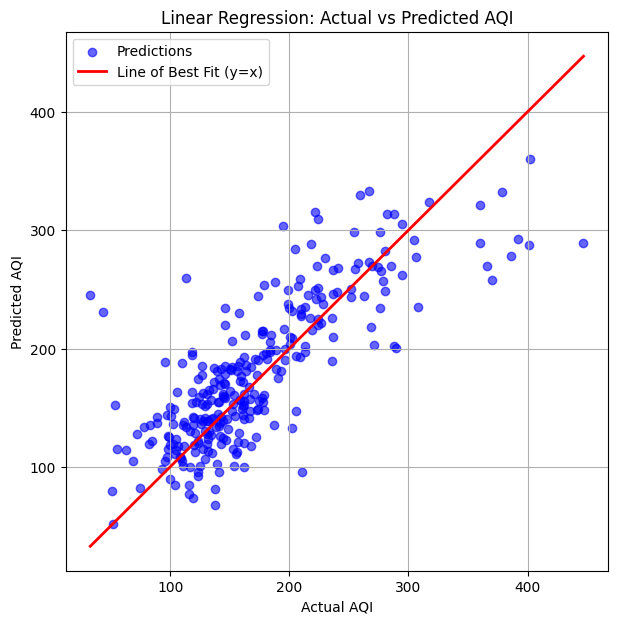

In [80]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np

# Initialize model
lr = LinearRegression()

# Define hyperparameter grid (just fit_intercept)
param_grid = {
    'fit_intercept': [True, False]
}

# GridSearchCV with 5-fold cross-validation
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search_lr.fit(X_train, y_train)

# Best model
best_lr = grid_search_lr.best_estimator_
print("Best fit_intercept:", grid_search_lr.best_params_)
print("Best CV RMSE:", -grid_search_lr.best_score_)

# Predict on test set
y_pred = best_lr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")

# Line of best fit
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Line of Best Fit (y=x)')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Linear Regression: Actual vs Predicted AQI")
plt.legend()
plt.grid(True)
plt.show()


### Ridge Regression

Best Ridge parameters: {'alpha': 10, 'fit_intercept': True, 'solver': 'auto'}
Best CV RMSE (Ridge): 50.419629929619944
Test RMSE (Ridge): 43.55
Test R² (Ridge): 0.60


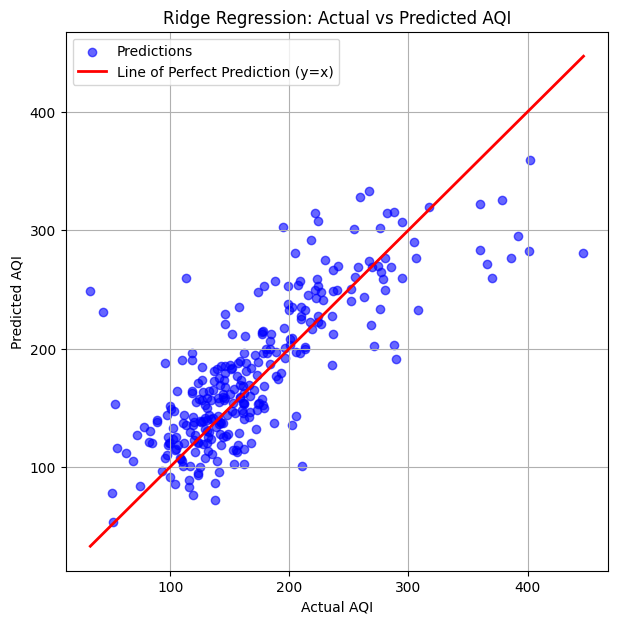

In [81]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score

# Initialize Ridge regression
ridge = Ridge()

# Define hyperparameter grid
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# GridSearchCV with 5-fold cross-validation
grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search_ridge.fit(X_train, y_train)

# Best model
best_ridge = grid_search_ridge.best_estimator_
print("Best Ridge parameters:", grid_search_ridge.best_params_)
print("Best CV RMSE (Ridge):", -grid_search_ridge.best_score_)

# Predict on test set
y_pred = best_ridge.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE (Ridge): {rmse:.2f}")
print(f"Test R² (Ridge): {r2:.2f}")


# Line of best fit
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Line of Perfect Prediction (y=x)')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Ridge Regression: Actual vs Predicted AQI")
plt.legend()
plt.grid(True)
plt.show()


### Lasso Regression

Best Lasso parameters: {'alpha': 0.1, 'fit_intercept': True}
Best CV RMSE (Lasso): 50.41079834496729
Test RMSE (Lasso): 43.51
Test R² (Lasso): 0.60


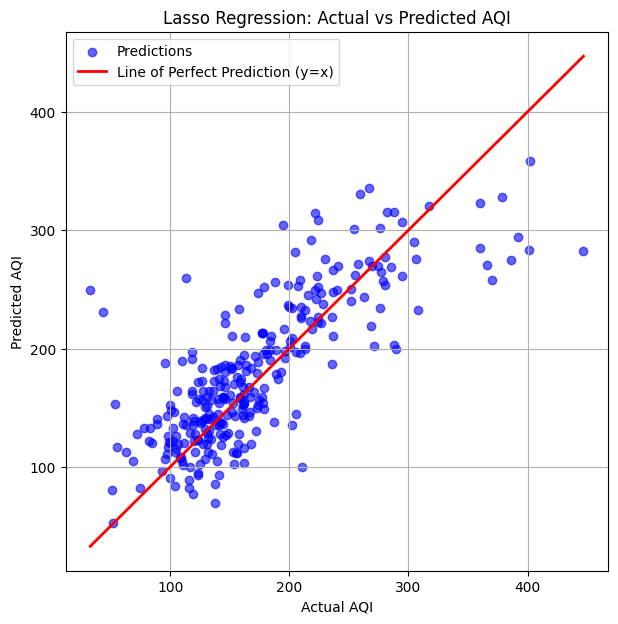

In [82]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score

# Initialize Lasso regression
lasso = Lasso(max_iter=10000)

# Define hyperparameter grid
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # regularization strength
    'fit_intercept': [True, False]
}

# GridSearchCV with 5-fold cross-validation
grid_search_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search_lasso.fit(X_train, y_train)

# Best model
best_lasso = grid_search_lasso.best_estimator_
print("Best Lasso parameters:", grid_search_lasso.best_params_)
print("Best CV RMSE (Lasso):", -grid_search_lasso.best_score_)

# Predict on test set
y_pred = best_lasso.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE (Lasso): {rmse:.2f}")
print(f"Test R² (Lasso): {r2:.2f}")

# Plot line of best fit
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Line of Perfect Prediction (y=x)')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Lasso Regression: Actual vs Predicted AQI")
plt.legend()
plt.grid(True)
plt.show()
